# Исследование надежности заемщиков


## Откроем таблицу и изучим общую информацию о данных

Считаем данные из csv-файла в датафрейм и сохраним в переменную `data`

In [1]:
import pandas as pd

data = pd.read_csv('/datasets/data.csv')

Выведем первые 20 строчек датафрейма `data` на экран

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Выведем основную информацию о датафрейме

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

Выведем количество пропущенных значений для каждого столбца

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце мы обработаем на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполним пропуски в этом столбце медианным значением по каждому типу из столбца `income_type`. 

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Обработаем значения в этом столбце: заменим все отрицательные значения положительными 

In [6]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть. Тем более этот столбец не понадобится нам для исследования.

Выведем перечень уникальных значений столбца `children`

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

Ещё раз выведем перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

Заполним пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

Убедимся, что все пропуски заполнены

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

Заменим вещественный тип данных в столбце `total_income` на целочисленный

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру

In [14]:
data['education'] = data['education'].str.lower()

Выведем на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследование данных и ответы на вопросы заказчика

### Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
mean_percent = data['debt'].mean()
print(f'Процент людей в выборке, имеющих долг: {mean_percent:.2%}')
data_table = data.groupby('children').agg({'debt':['count','sum','mean']})
data_table = data_table.reset_index(drop=False) # выводим из индексов столбец, чтобы его название можно было поменять
data_table.columns = ['Количество детей','Всего кредитополучателей', 'Всего должников', 'Процент должников']#заменяем название столбцов для красоты
data_table['Процент должников'] = data_table['Процент должников'].apply('{:,.2%}'.format) #переводим в проценты и округляем
data_table

Процент людей в выборке, имеющих долг: 8.12%


,Количество детей,Всего кредитополучателей,Всего должников,Процент должников
0,0,14091,1063,7.54%
1,1,4808,444,9.23%
2,2,2052,194,9.45%
3,3,330,27,8.18%
4,4,41,4,9.76%
5,5,9,0,0.00%


**Вывод:**

В среднем процент людей по выборке, имеющих долги около 8%. 
Можно заметить, что в зависимости от количества детей этот показатель меняется не сильно, но он ниже среднего только среди людей, у которых нет детей. 
Подвыборка людей с 5 детьми в датасете оказалась такой маленькой, что ее нельзя считать репрезентативной и нельзя сделать выводы из отсутсвия в ней должников. Это может быть случайным совпадением.

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [23]:
data_table = data.groupby('family_status').agg({'debt':['count','sum','mean']})
data_table = data_table.reset_index(drop=False)
data_table.columns = ['Семейное положение','Всего кредитополучателей', 'Всего должников', 'Процент должников']#заменяем название столбцов для красоты
data_table['Процент должников'] = data_table['Процент должников'].apply('{:,.2%}'.format) #переводим в проценты и округляем
data_table.sort_values(by='Процент должников', ascending=True) #сортируем

,Семейное положение,Всего кредитополучателей,Всего должников,Процент должников
2,вдовец / вдова,951,63,6.62%
1,в разводе,1189,84,7.06%
4,женат / замужем,12261,927,7.56%
3,гражданский брак,4134,385,9.31%
0,Не женат / не замужем,2796,273,9.76%


**Вывод:**

Чаще среднего долги имеют люди не вступавшие в официальный брак (не женатые/не замужние люди и в гражданском браке), а все остальные категории реже среднего показателя.

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [24]:
data_table = data.groupby('total_income_category').agg({'debt':['count','sum','mean']})
data_table = data_table.reset_index(drop=False)
data_table.columns = ['Уровень дохода','Всего кредитополучателей', 'Всего должников', 'Процент должников']#заменяем название столбцов для красоты
data_table['Расшифровка уровня доходов'] = ['1000001 и выше','200001–1000000','50001–200000','0–30000','30001–50000']
data_table['Процент должников'] = data_table['Процент должников'].apply('{:,.2%}'.format) #переводим в проценты и округляем
data_table

,Уровень дохода,Всего кредитополучателей,Всего должников,Процент должников,Расшифровка уровня доходов
0,A,25,2,8.00%,1000001 и выше
1,B,5014,354,7.06%,200001–1000000
2,C,15921,1353,8.50%,50001–200000
3,D,349,21,6.02%,0–30000
4,E,22,2,9.09%,30001–50000


**Вывод:**

На первый взгляд кажется, что люди попавшие в категорию с минимальным доходом, чаще всего не возвращают долги вовремя, но это может быть следствием того, что в эту подвыборку попало всего 22 кредитополучателя. Такая маленькая выборка с большей вероятностью не будет репрезентативной. Так же слишком маленькой будет подвыбока людей с максимальным доходом. Если взглянуть на распределение в остальных данных, четкой закономерности между размерами доходов и возвратом кредита в срок не прослеживается. Если же сравнить две самые большие выборки (категории В и С), то можно проследить что, уменьшение доходов приводит к увеличению процента должников.

### Как разные цели кредита влияют на его возврат в срок?

In [25]:
data_table = data.groupby('purpose_category').agg({'debt':['count','sum','mean']})
data_table = data_table.reset_index(drop=False)
data_table.columns = ['Категория цели','Всего кредитополучателей', 'Всего должников', 'Процент должников']#заменяем название столбцов для красоты
data_table['Процент должников'] = data_table['Процент должников'].apply('{:,.2%}'.format) #переводим в проценты и округляем
data_table.sort_values(by='Процент должников', ascending=True) #сортируем

,Категория цели,Всего кредитополучателей,Всего должников,Процент должников
1,операции с недвижимостью,10751,780,7.26%
3,проведение свадьбы,2313,183,7.91%
2,получение образования,3988,369,9.25%
0,операции с автомобилем,4279,400,9.35%


**Вывод:** 

Чаще среднего вовремя не отдают долг люди, запрашивающие кредит на покупку автомобиля и получения образования, реже среднего на покупку квартиры и проведения свадьбы.

### Приведем возможные причины появления пропусков в исходных данных.

In [26]:
# загрузим данные еще раз, чтобы посмотреть где были пропуски
try:
    raw_data = pd.read_csv('/datasets/data.csv')
except:
    raw_data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [27]:
raw_data[raw_data['total_income'].isna()].groupby('income_type')['income_type'].count()

income_type
госслужащий         147
компаньон           508
пенсионер           413
предприниматель       1
сотрудник          1105
Name: income_type, dtype: int64

**Ответ:**

Проверив предположение, что пропуски зависят от типа занятости, было обнаружено, что это не так.
В данных не найдена взаимосвязь между пропусками и другими исходными данными, кроме того, что пропуски возникали у заемщиков одновременно в обоих графах и в доходах и в стаже. Возможно, эти графы не были записаны, как обязательные, вследствие чего люди их пропускали. Либо возникла техническая ошибка и часть данных была утеряна.

### Почему заполнить пропуски медианным значением — лучшее решение для количественных переменных?

**Ответ:**

За неимением изначальных данных мы можем вписать в пропуски либо среднее, либо медианное значение. Медианное значение будет более точным, так как не будет искажено экстремально низкими или высокими значениями (выбросами данных). Это значение будет еще точнее за счет того, что мы вписываем среднее не по всей выборке, а по конкретной категории дохода.

### Есть ли зависимость между образованием и возвратом кредита в срок?

In [28]:
data_table = data.groupby('education').agg({'debt':['count','sum','mean']})
data_table = data_table.reset_index(drop=False)
data_table.columns = ['Образование','Всего кредитополучателей', 'Всего должников', 'Доля должников']#заменяем название столбцов для красоты
data_table['Доля должников'] = (data_table['Доля должников']).apply('{:,.4f}'.format) #переводим в проценты и округляем
data_table.sort_values(by='Доля должников', ascending=True) #сортируем

,Образование,Всего кредитополучателей,Всего должников,Доля должников
4,ученая степень,6,0,0.0000
0,высшее,5227,278,0.0532
3,среднее,15075,1355,0.0899
2,неоконченное высшее,741,68,0.0918
1,начальное,282,31,0.1099


**Вывод:**

Дополним наше исследование поиском зависимости между другими параметрами и возвратом кредита в срок. Наличие высшего образования в нашей выборке значительно увеличивает вероятность возврата долга в срок.

### Есть ли зависимость между типом занятости и возвратом кредита в срок?

In [29]:
data_table = data.groupby('income_type').agg({'debt':['count','sum','mean']})
data_table = data_table.reset_index(drop=False)
data_table.columns = ['Тип занятости','Всего кредитополучателей', 'Всего должников', 'Доля должников']#заменяем название столбцов для красоты
data_table['Доля должников'] = (data_table['Доля должников']).apply('{:,.4f}'.format) #переводим в проценты и округляем
data_table.sort_values(by='Доля должников', ascending=True) #сортируем

,Тип занятости,Всего кредитополучателей,Всего должников,Доля должников
5,предприниматель,2,0,0.0000
7,студент,1,0,0.0000
4,пенсионер,3812,216,0.0567
2,госслужащий,1451,86,0.0593
3,компаньон,5047,374,0.0741
6,сотрудник,11015,1054,0.0957
0,безработный,2,1,0.5000
1,в декрете,1,1,1.0000


**Вывод:**

Категории в декрете, безработные, предприниматели и студенты оказались слишком маленьким, чтобы сделать из них выводы. Если рассматривать все остальные категории, то сотрудники погашали кредит вовремя реже среднего по выборке, а компаньоны, госслужащие и пенсионеры чаще.


### Есть ли зависимость между полом и возвратом кредита в срок?

In [30]:
data_table = data.groupby('gender').agg({'debt':['count','sum','mean']})
data_table = data_table.reset_index(drop=False)
data_table.columns = ['Пол','Всего кредитополучателей', 'Всего должников', 'Доля должников']#заменяем название столбцов для красоты
data_table['Доля должников'] = (data_table['Доля должников']).apply('{:,.4f}'.format) #округляем
data_table.sort_values(by='Доля должников', ascending=True) #сортируем

,Пол,Всего кредитополучателей,Всего должников,Доля должников
2,XNA,1,0,0.0000
0,F,14092,989,0.0702
1,M,7238,743,0.1027


**Вывод:**

Женщины в нашей выборке чаще мужчин не имеют долга. Так же присутсвует одно неидентифицируемое значение в этой графе, но оно не влияет на наши выводы.

### Есть ли зависимость между возрастом и возвратом кредита в срок?

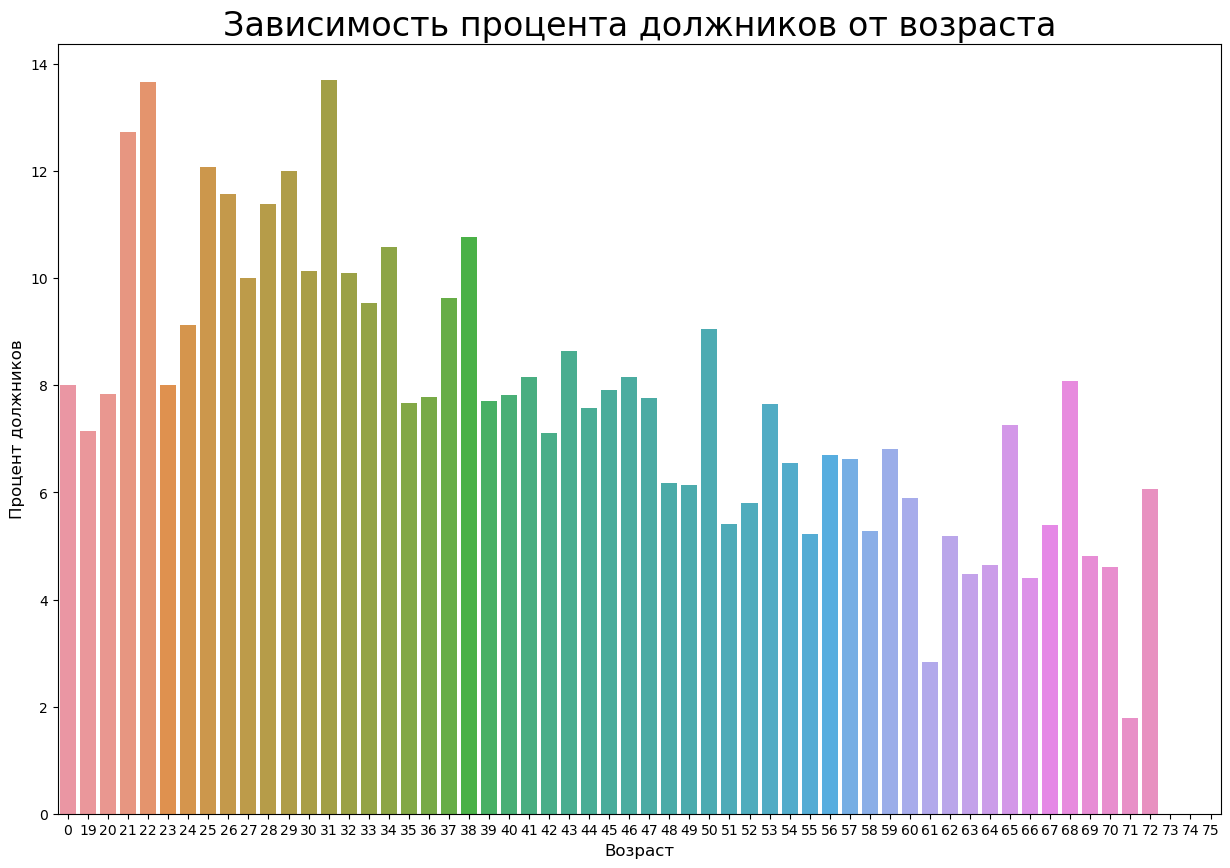

In [31]:
import seaborn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = ( 15 , 10 )) #меняем размеры графика
mean_debt = data.groupby('dob_years')['debt'].mean()*100 #подготавливаем нужные данные

seaborn.barplot(x= mean_debt.index, y= mean_debt.values) #выводим график
ax.set_xlabel( "Возраст" , size = 12 ) #меняем заголовки 
ax.set_ylabel( "Процент должников" , size = 12 )
ax.set_title( "Зависимость процента должников от возраста" , size = 24 )
plt.show()

**Вывод:**

На графике видно, что люди чаще среднего имеют долг в более молодом возрасте. Так же в наших данных 100 человек указало нулевой возраст, это ошибка, но на наши выводы это не повлияло.


## Общий вывод.

Для построении модели кредитного скоринга заказчик запросил исследование влияния ли семейного положения и количества детей клиента на факт погашения кредита в срок. Мы изучали входные данные от банка — статистику о платёжеспособности клиентов. В ходе предобработки данных были выявлены ошибки в данных: пропуски, аномальные значения, дубликаты. Пропуски были заполены медианными значениями по категории, отрицательные значения взяты по модулю, строчки с аномальным количеством детей удалены, дубликаты с разными регистрами в графе education выявлены и удалены. Исследование показало, что количество детей у клиента не влияет, но влияет их наличие или отсутствие. Рекомендуется отдать предпочтение клиентам не имеющим детей. По параметру семейного положения более надежными оказались люди вступавшие в официальный брак, а именно: замужние/женатые, в разводе, вдовы/вдовцы. Эти люди чаще среднего погашали кредит в срок. Две самые большие категории по размеру дохода показали, что люди с бОльшим уровнем дохода чаще не имеют долга.

Так же при построении модели, имеет смысл учесть цель кредита, наличие высшего образования, тип занятости, пол и возраст клиента.